## Deliverables

- A Jupyter notebook containing all the code used.
- A short report (2-3 pages) summarizing the findings and insights from the exercises, including figures and tables as necessary. (This can but does not have to be done in LaTeX! It could be done in Markdown format inside the Jupyter Notebook)
- Submit work to the hand-in folder via the Moodle course - it is a group report but please hand in individually with all group member names and group name easy to find.

## Task 1: Data Exploration and Cleaning

**Objective:** Understand the dataset's structure, clean the data, and handle missing
values.

### 1.1 Find and Download a Dataset

Use Kaggle to find a dataset of interest. It should have both numerical and categorical data and some missing values.

In [188]:
import seaborn as sns

df = sns.load_dataset('taxis')

### 1.2 Data Exploration

- Load the dataset using pandas.
- Use .describe(), .info(), and .head() to explore the dataset's structure, summary statistics, and first few rows. Use comments or markdown cells to explain the data

In [189]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [191]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [192]:
df.shape

(6433, 14)

### 1.3 Data Cleaning

- Identify columns with missing values.
- For numerical columns, interpolate missing values.
- For categorical columns, replace missing values with the mode or another standard technique (such as the mean of the two adjacent data points)
- Drop columns with more than 50% missing values.
- Drop extreme outliers and explain why they were considered outliers

In [193]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [194]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype("string")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   string        
 9   payment          6389 non-null   string        
 10  pickup_zone      6407 non-null   string        
 11  dropoff_zone     6388 non-null   string        
 12  pickup_borough   6407 non-null   string        
 13  dropoff_borough  6388 non-null   string        
dtypes: datetime64[ns](2), float64(5), int64(

In [195]:
df[df.isnull().any(axis=1)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.00,0.0,11.80,yellow,<NA>,Murray Hill,Flatiron,Manhattan,Manhattan
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,<NA>,<NA>,<NA>,<NA>
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.00,0.0,6.30,yellow,<NA>,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.00,0.0,5.80,yellow,<NA>,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.00,0.0,15.80,yellow,<NA>,LaGuardia Airport,Forest Hills,Queens,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,2019-03-30 00:49:48,2019-03-30 00:49:56,1,0.0,25.0,0.00,0.0,25.50,green,credit card,Prospect Heights,<NA>,Brooklyn,<NA>
6169,2019-03-27 02:11:01,2019-03-27 02:12:03,1,4.1,3.0,0.00,0.0,4.30,green,<NA>,Jackson Heights,Jackson Heights,Queens,Queens
6311,2019-03-12 07:10:30,2019-03-12 07:14:18,1,0.7,4.5,0.00,0.0,5.30,green,<NA>,Long Island City/Hunters Point,Long Island City/Hunters Point,Queens,Queens
6314,2019-03-28 22:36:04,2019-03-28 22:36:07,1,0.0,25.0,0.00,0.0,25.00,green,cash,Jamaica,<NA>,Queens,<NA>


All null values are typed in as `<NA>` in the dataset.
Since it is only 92 rows we have decided to drop all rows with missing values.

In [196]:
df = df.dropna()

In [197]:
df.shape

(6341, 14)

In [198]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365


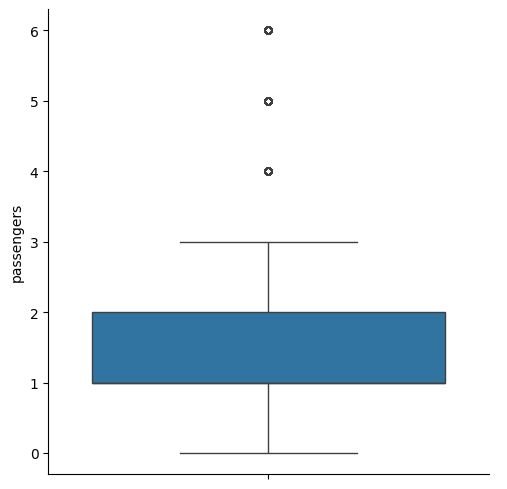

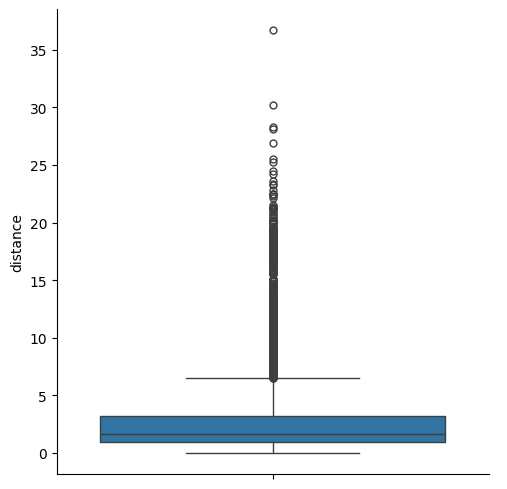

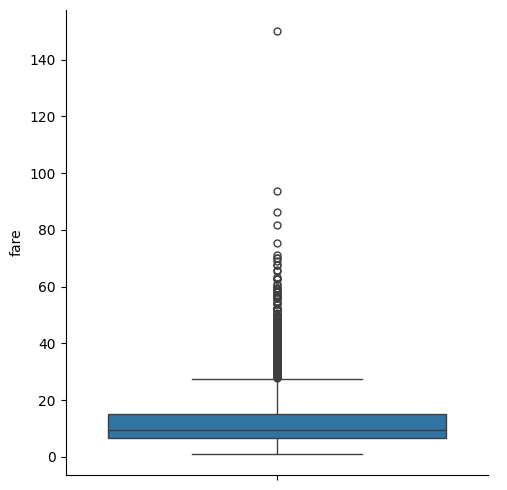

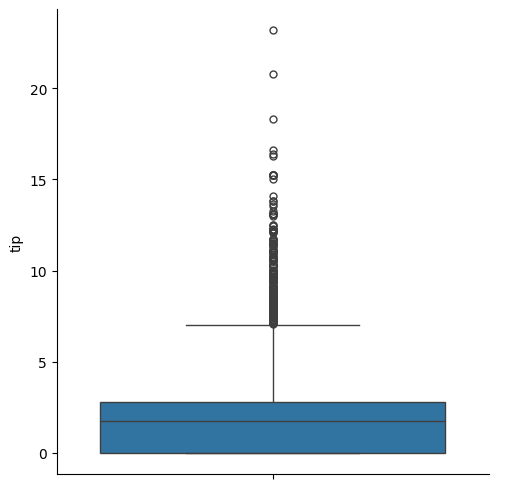

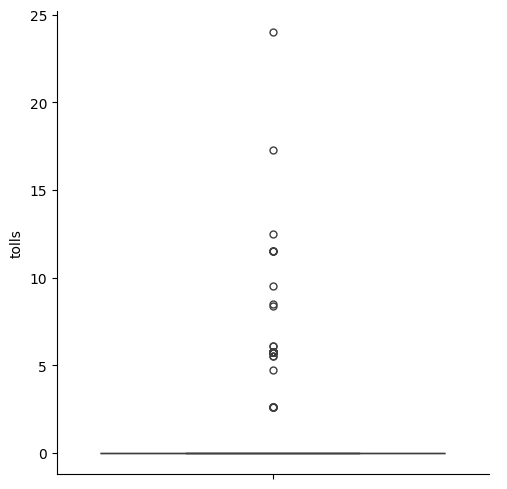

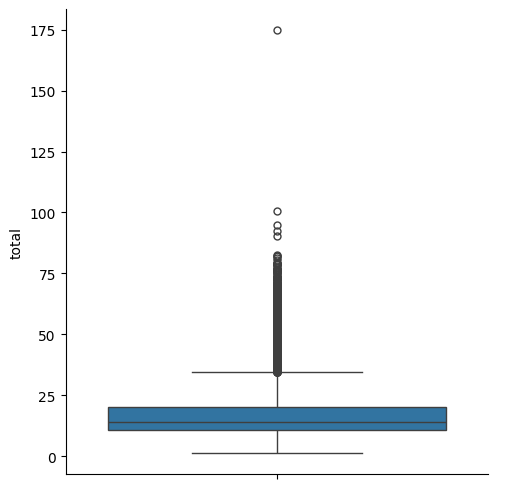

In [199]:
sns.catplot(data=df, y='passengers', kind='box')
sns.catplot(data=df, y='distance', kind='box')
sns.catplot(data=df, y='fare', kind='box')
sns.catplot(data=df, y='tip', kind='box')
sns.catplot(data=df, y='tolls', kind='box')
sns.catplot(data=df, y='total', kind='box')

### 1.4 Data Visualization

- Use matplotlib or seaborn to visualize the distribution of variables both quantitative and categorical (parametric and non-parametric)

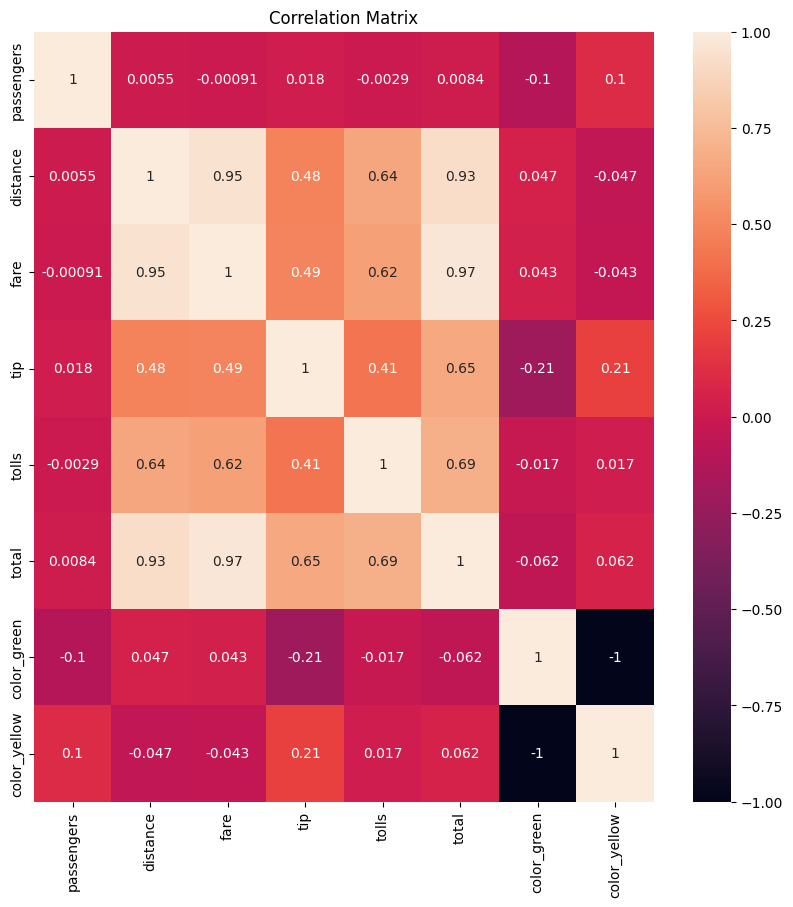

In [200]:
import pandas as pd

df_corr = df[['passengers', 'distance', 'fare', 'tip', 'tolls', 'total', 'color']]
# one hot encode color
df_corr = pd.get_dummies(df_corr, columns=['color'])

df_corr = df_corr.corr()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()


## Task 2: Feature Engineering and Descriptive Statistics

**Objective:** Enhance the dataset with new features and then use descriptive statistics
to explain the distribution of the data.

### 2.1 Feature Engineering

- Create a new feature by binning a numerical variable into categories (e.g., low, medium, high). Put ranges (eg age, into three or four groups rather than a continuous distribution)
- Implement one-hot encoding for a categorical variable.

### 2.2 Descriptive Statistics

- Calculate the mean, median, and standard deviation for numerical features.
- For categorical features, count the frequency of each category.

### 2.3 Visualization

- Use seaborn to create box plots for numerical features to identify outliers.
- Visualize the distribution of categorical features using bar plots.

## Task 3: Data Wrangling and Analysis

**Objective:** Perform data wrangling to prepare data for analysis and conduct simple
analysis to extract stories about the data - what can we say about this data?.

### 3.1 Data Selection and Wrangling

- Select a subset of columns relevant to a hypothetical question of interest (e.g., predicting a target variable).
- Use .groupby() to aggregate data and calculate mean values for each category of a selected categorical variable.

### 3.2 Data Analysis

- Use seaborn to create scatter plots to visualize relationships between pairs of numerical variables.(X an Y axis are used for the variables)
- Create a pairplot to visualize the pairwise relationships in the dataset.

See https://seaborn.pydata.org/generated/seaborn.pairplot.html

### 3.3 Insights:

- Based on the visualizations and descriptive statistics, write down 3 insights about the dataset.